In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('australian.csv')
data.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','Y']
data.shape

(689, 15)

In [2]:
print('null values in dataset is: \n', data.isnull().sum())
#We can use isnull() method to check whether a cell 
#contains a numeric value ( False ) or if data is missing ( True )
#and used with the sum() method which returns the number of missing values per column

null values in dataset is: 
 X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
Y      0
dtype: int64


In [3]:
#b Preprocess the dataset to fill the missing values
#==>There is no missing values in the data se as shown above
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

X = data.drop(['Y'], axis=1).values
y = data['Y'].values
X = pd.DataFrame(X)

# Scaling - Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X.shape


(689, 14)

In [4]:
# d. min-max normalization to bring all features in similar range
import matplotlib.pyplot as plt

# copy the data
df_min_max_scaled = X.copy()
  
# min-max normalization to bring all features in similar range.  
# (value - min) / (max -min)
for column in range(0,14):
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
    
# view normalized data
df_min_max_scaled.shape

(689, 14)

In [5]:
#2. Split the dataset into training and testing data
from sklearn.model_selection import train_test_split

X = df_min_max_scaled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

#3. Apply SVM algo on X dataset to get appropriate model

from sklearn import svm
clf = svm.SVC(kernel='linear', C=0.01) #clf is the model ; C is regularization parameter; Linear kernel used for linearly separable dataset;
# As values of C parameter increases, misclassification will be less . Thus it leads to overfitting as the margin becomes more harder/smaller
# High values of gamma leads to overfitting as it correctly identifies the support vectors and accordingly a harder margin. Its related to Gaussian kernel

clf.fit(X_train, y_train)    #Fit the model

y_pred = clf.predict(X_test)
print(clf.intercept_, clf.coef_)  #the theta parameters t0 given by intercept_ , the remaining parameters t1,t2 given by array coef_ . 

theta_0=clf.intercept_
theta = clf.coef_


# Add theta0 with theta array to form a single vector
thetas = np.insert(theta[0],0,theta_0)    #theta_0 added at the front of the array. Index 0

print('thetas ',thetas)

[-0.02042642] [[-2.57611176e-03 -4.63658363e-04 -1.44914405e-02  3.42821010e-02
   1.10372841e-01  3.35815429e-02  9.24389560e-02  8.55258243e-01
   6.95574690e-02  8.47541231e-02 -1.51817076e-02  3.71661310e-02
  -2.67453336e-02  9.60299372e-02]]
thetas  [-2.04264230e-02 -2.57611176e-03 -4.63658363e-04 -1.44914405e-02
  3.42821010e-02  1.10372841e-01  3.35815429e-02  9.24389560e-02
  8.55258243e-01  6.95574690e-02  8.47541231e-02 -1.51817076e-02
  3.71661310e-02 -2.67453336e-02  9.60299372e-02]


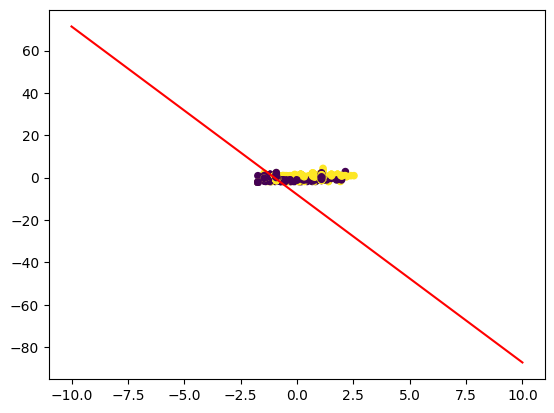

In [6]:
#Form points to draw Decision boundary 

p1 = np.linspace(-10, 10)    # generating points for X-axis
p2 = -(thetas[0] / thetas[1]) * p1 - thetas[0] / thetas[1]  # getting corresponding Y-axis points

#Plot data and decision boundary

target= y_pred


fig= plt.figure()
ax=fig.add_subplot(111)     #Inorder to have multiple plots in the same figure

plt.scatter(X_test[:,0],X_test[:,1],c = target,s=20)
plt.scatter(X_test[:,2],X_test[:,3],c = target,s=20)
plt.scatter(X_test[:,4],X_test[:,5],c = target,s=20)
plt.scatter(X_test[:,6],X_test[:,7],c = target,s=20)
plt.scatter(X_test[:,8],X_test[:,9],c = target,s=20)
plt.scatter(X_test[:,10],X_test[:,12],c = target,s=20)

# Plotting a red hyperplane
plt.plot(p1,p2, c='r');

plt.show()

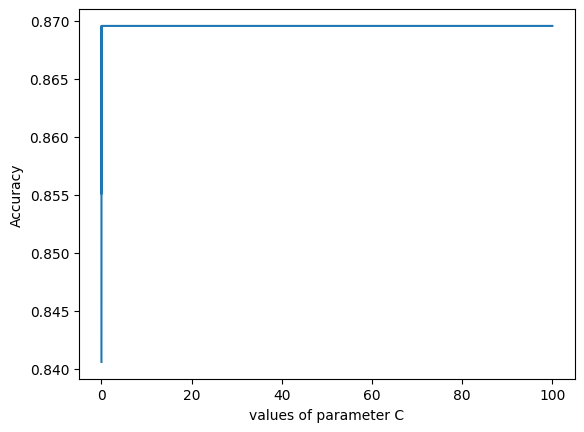

In [7]:
#b. For different values of parameter ‘C’, plot the accuracy of the test dataset
from sklearn.metrics import accuracy_score

C = [0.0005,0.01,0.001,0.1, 1, 10,100]
accuracy = []
for c in C:
    classifier = svm.SVC(kernel='linear', C = c)  
    classifier.fit(X_train, y_train)    #Fit the model
    y_pred = classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.plot(C,accuracy)
plt.xlabel('values of parameter C')
plt.ylabel('Accuracy')
plt.show()

In [8]:
# 4. Does the accuracy change if the kernel function changes?
# YES!


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)

print("\nMean of the Accuracies after cross-validation: ", accuracies.mean())
print("\nStandard Deviation within the accuracies: ", accuracies.std())

print('\nAccuracy: ', accuracy)



Mean of the Accuracies after cross-validation:  0.843961038961039

Standard Deviation within the accuracies:  0.03349044466146827

Accuracy:  0.8695652173913043


In [9]:
#Use Poly kernel as well as RBF kernel to check the accuracy

In [10]:
#Poly kernel 
clf = svm.SVC(kernel='poly', C=0.01)

clf.fit(X_train, y_train)    #Fit the model

y_pred = clf.predict(X_test)


In [11]:
accuracy = accuracy_score(y_test, y_pred)

# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)

print("\nMean of the Accuracies after cross-validation: ", accuracies.mean())
print("\nStandard Deviation within the accuracies: ", accuracies.std())

print('\nAccuracy: ', accuracy)


Mean of the Accuracies after cross-validation:  0.5662012987012986

Standard Deviation within the accuracies:  0.024251508134974047

Accuracy:  0.6666666666666666


In [12]:
#rbf kernel 
clf = svm.SVC(kernel='rbf', C=0.01)
clf.fit(X_train, y_train)    #Fit the model

y_pred = clf.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)

# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)

print("\nMean of the Accuracies after cross-validation: ", accuracies.mean())
print("\nStandard Deviation within the accuracies: ", accuracies.std())

print('\nAccuracy: ', accuracy)


Mean of the Accuracies after cross-validation:  0.539025974025974

Standard Deviation within the accuracies:  0.008205747320478244

Accuracy:  0.6159420289855072
